In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

In [36]:
pd.read_csv('heroes.csv')

,id,localized_name,name
0,1,Anti-Mage,antimage
1,2,Axe,axe
2,3,Bane,bane
3,4,Bloodseeker,bloodseeker
4,5,Crystal Maiden,crystal_maiden
5,6,Drow Ranger,drow_ranger
6,7,Earthshaker,earthshaker
7,8,Juggernaut,juggernaut
8,9,Mirana,mirana
9,11,Shadow Fiend,nevermore


In [35]:
data = pd.read_csv('features.csv', index_col=0)
data = data.drop(['tower_status_radiant', 'tower_status_dire', 
                  'barracks_status_radiant', 'barracks_status_dire', 
                  'duration', 
#                   'start_time', 'match_id'
                 ], axis=1, )
data.head()

test = pd.read_csv('features_test.csv', index_col=0)
test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [15]:
data[['r1_xp', 'r1_level', 'r1_gold', 'r1_lh', 'r1_kills', 'r1_items', 'radiant_win']].corr()

,r1_xp,r1_level,r1_gold,r1_lh,r1_kills,r1_items,radiant_win
r1_xp,1.000000,0.888434,0.755920,0.750030,0.154025,-0.019776,0.049964
r1_level,0.888434,1.000000,0.668846,0.667622,0.124815,-0.007040,0.037051
r1_gold,0.755920,0.668846,1.000000,0.851178,0.438279,0.154269,0.093568
r1_lh,0.750030,0.667622,0.851178,1.000000,0.037159,0.026932,0.054962
r1_kills,0.154025,0.124815,0.438279,0.037159,1.000000,0.263658,0.080822
r1_items,-0.019776,-0.007040,0.154269,0.026932,0.263658,1.000000,0.053265
radiant_win,0.049964,0.037051,0.093568,0.054962,0.080822,0.053265,1.000000


In [40]:
X = data.drop(['radiant_win'], axis=1)
y = data['radiant_win']

In [41]:
X.shape

(97230, 102)

In [12]:
list(data.columns)

['start_time',
 'lobby_type',
 'r1_hero',
 'r1_level',
 'r1_xp',
 'r1_gold',
 'r1_lh',
 'r1_kills',
 'r1_deaths',
 'r1_items',
 'r2_hero',
 'r2_level',
 'r2_xp',
 'r2_gold',
 'r2_lh',
 'r2_kills',
 'r2_deaths',
 'r2_items',
 'r3_hero',
 'r3_level',
 'r3_xp',
 'r3_gold',
 'r3_lh',
 'r3_kills',
 'r3_deaths',
 'r3_items',
 'r4_hero',
 'r4_level',
 'r4_xp',
 'r4_gold',
 'r4_lh',
 'r4_kills',
 'r4_deaths',
 'r4_items',
 'r5_hero',
 'r5_level',
 'r5_xp',
 'r5_gold',
 'r5_lh',
 'r5_kills',
 'r5_deaths',
 'r5_items',
 'd1_hero',
 'd1_level',
 'd1_xp',
 'd1_gold',
 'd1_lh',
 'd1_kills',
 'd1_deaths',
 'd1_items',
 'd2_hero',
 'd2_level',
 'd2_xp',
 'd2_gold',
 'd2_lh',
 'd2_kills',
 'd2_deaths',
 'd2_items',
 'd3_hero',
 'd3_level',
 'd3_xp',
 'd3_gold',
 'd3_lh',
 'd3_kills',
 'd3_deaths',
 'd3_items',
 'd4_hero',
 'd4_level',
 'd4_xp',
 'd4_gold',
 'd4_lh',
 'd4_kills',
 'd4_deaths',
 'd4_items',
 'd5_hero',
 'd5_level',
 'd5_xp',
 'd5_gold',
 'd5_lh',
 'd5_kills',
 'd5_deaths',
 'd5_items',


# Анализ данных

Посмотрим, как зависит выйгрыш команд от значения какждого признака по отдельности. 

In [5]:
# fig, axes = plt.subplots(nrows=26, ncols=3, figsize=(15, 50))
# for idx, feature in enumerate(data.columns[:-1]):
#     # print(idx //4, idx % 4)
#     data.plot("radiant_win", feature, subplots=True, kind="scatter", ax=axes[idx//4, idx % 3]) #axes[row, col]

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f14c7077268> (for post_execute):


KeyboardInterrupt: 

In [6]:
# important_feats = []
# importantces = dict(data.corrwith(y))
# for feat in importantces:
#     if abs(importantces[feat]) >= 0.09:
#         important_feats.append(feat)
# important_feats
        

['r1_gold',
 'r2_gold',
 'r4_gold',
 'r5_gold',
 'd1_gold',
 'd2_gold',
 'd4_gold',
 'd5_gold',
 'first_blood_team',
 'first_blood_player1',
 'first_blood_player2',
 'radiant_boots_count',
 'dire_boots_count',
 'radiant_win']

Посмотрим распределение значений признаков по колличеству

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc2651c0b8>,
      dtype=object)

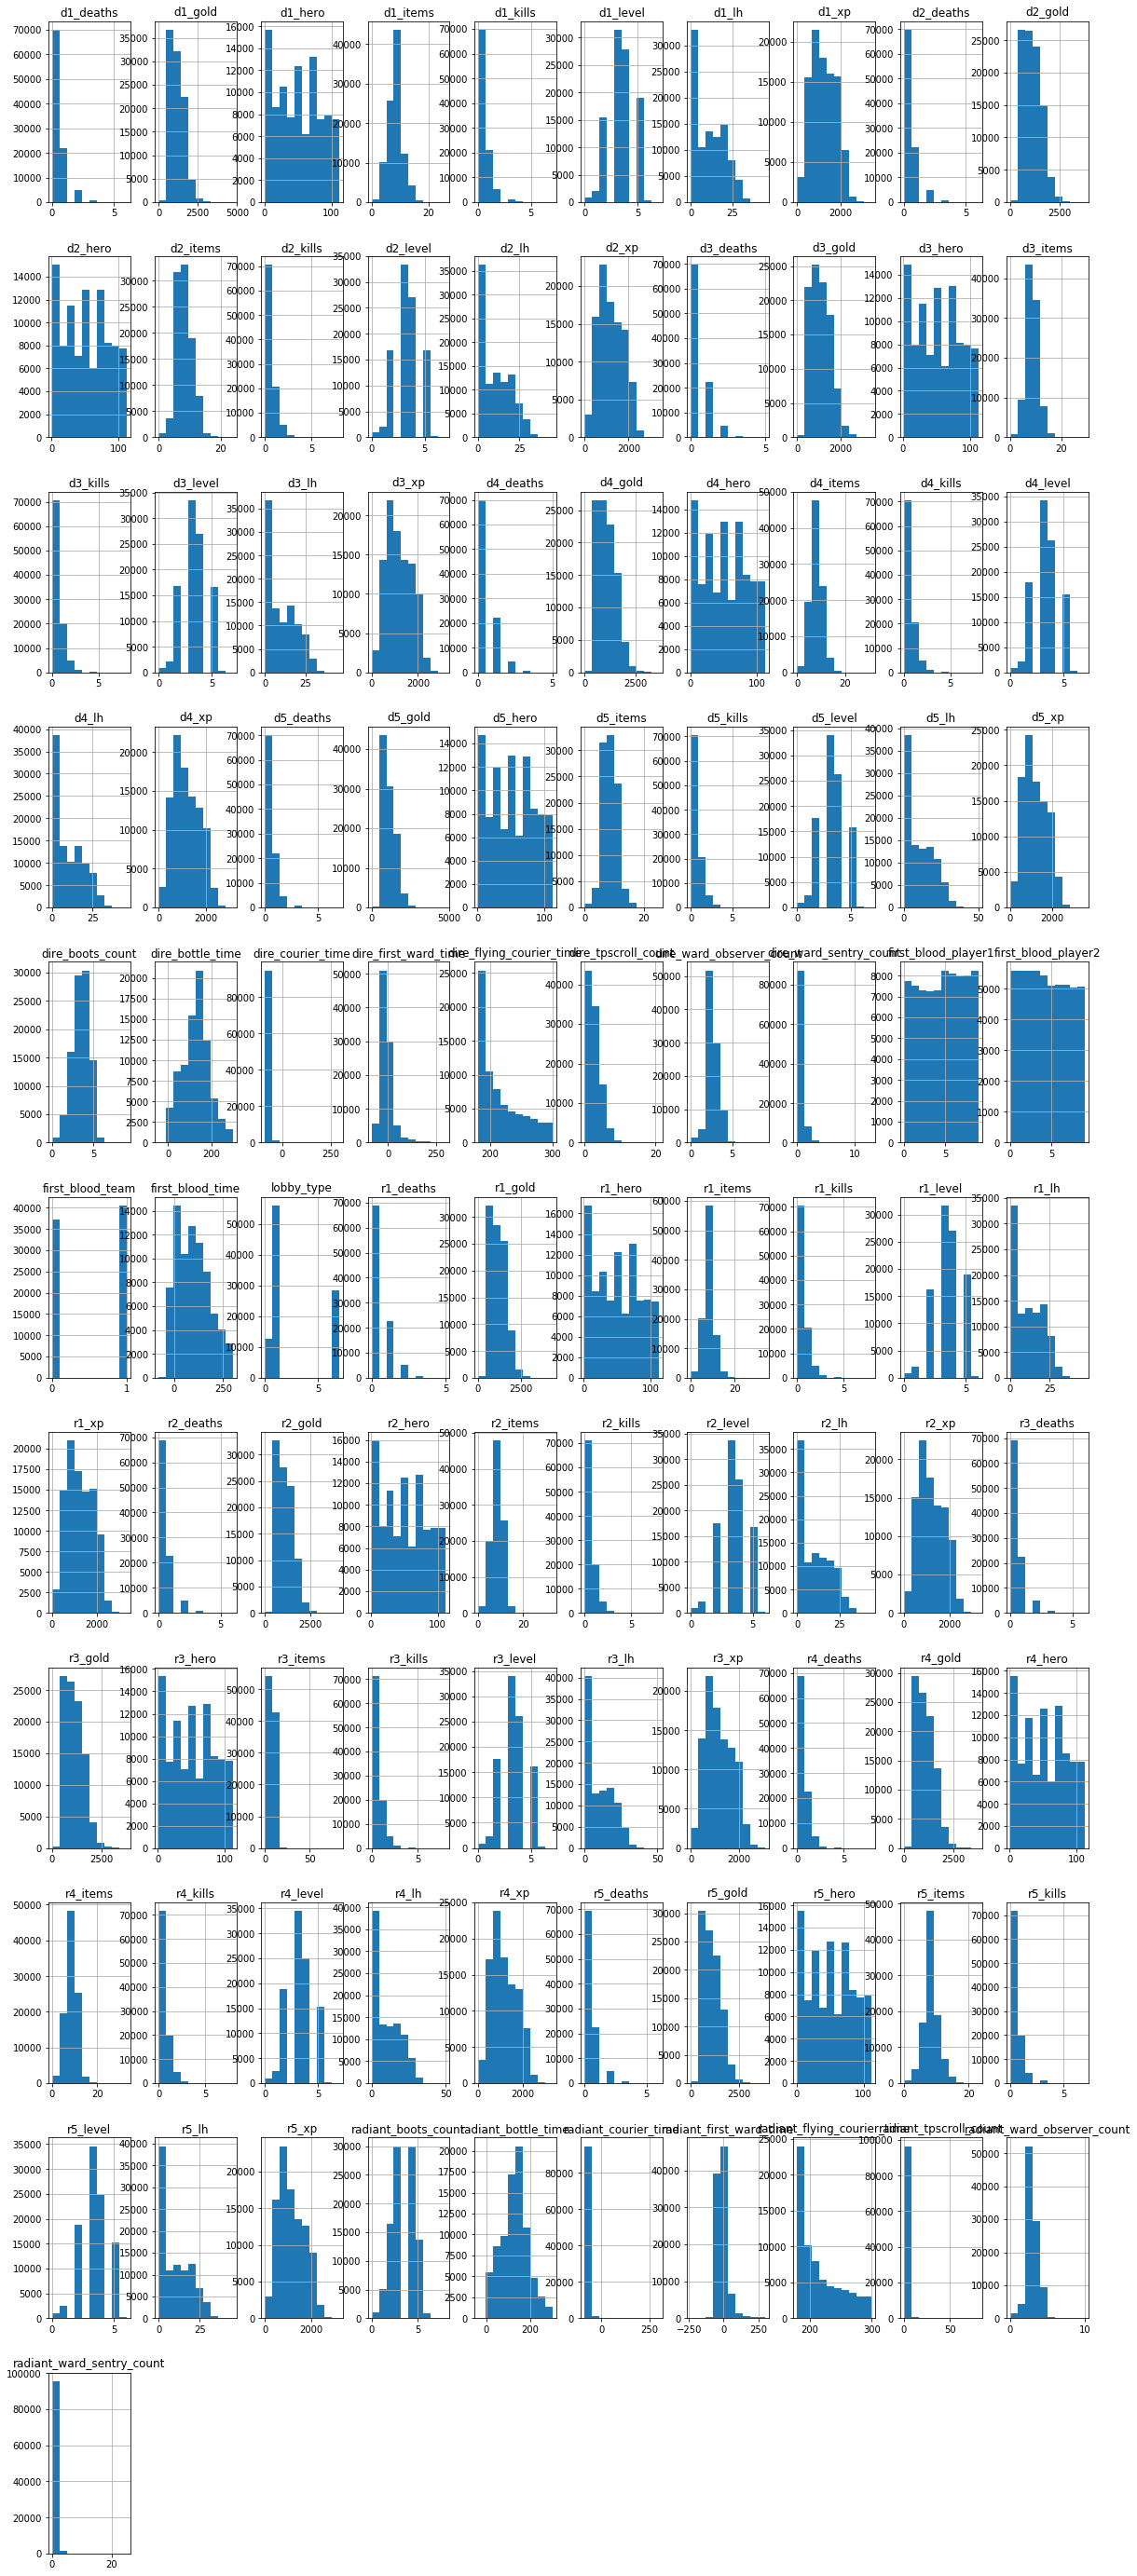

In [8]:
# X.hist(figsize=(20, 50))

По гистограммам можно выявить признаки, в которых значения стремятся к нормальному распределению. Иные признаки мы попробуем преобразовать.

In [7]:
heroes_feats = ['d1_hero','d2_hero','d3_hero','d4_hero','d5_hero',
        'r1_hero','r2_hero','r3_hero','r4_hero','r5_hero'] # создадим признак попурлярности героя

norm_distribut_feats = ['r1_level', 'r1_xp', 'r1_gold','r1_items', 
                           'd1_level', 'd1_xp', 'd1_gold','d1_items',
                          'r2_level', 'r2_xp', 'r2_gold','r2_items',
                           'd2_level', 'd2_xp', 'd2_gold','d2_items',
                          'r3_level', 'r3_xp', 'r3_gold','r3_items',
                           'd3_level', 'd3_xp', 'd3_gold','d3_items',
                          'r4_level', 'r4_xp', 'r4_gold','r4_items',
                           'd4_level', 'd4_xp', 'd4_gold','d4_items',
                          'r5_level', 'r5_xp', 'r5_gold','r5_items',
                           'd5_level', 'd5_xp', 'd5_gold','d5_items',
                          'radiant_bottle_time', 'dire_bottle_time',
                          'first_blood_time'] 

over_freq_feats = ['dire_ward_sentry_count', 'dire_courier_time',
                  'radiant_ward_sentry_count', 'radiant_tpscroll_count', 'radiant_courier_time']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc1dd42780>,
      dtype=object)

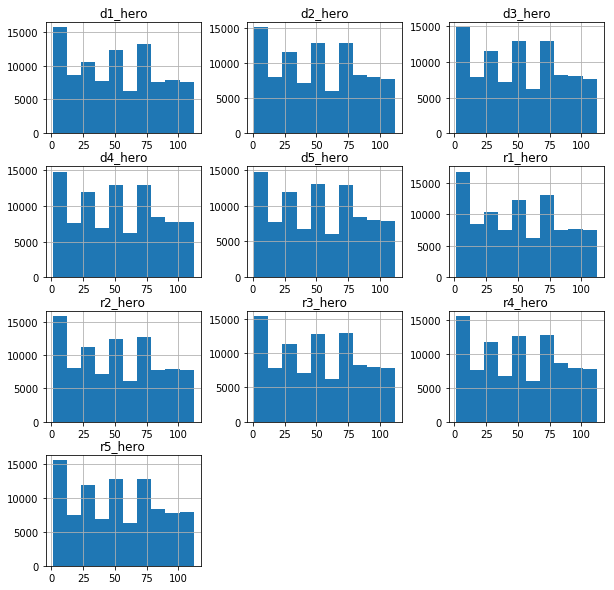

In [20]:
# X[heroes_feats].hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bdac984e0>,
      dtype=object)

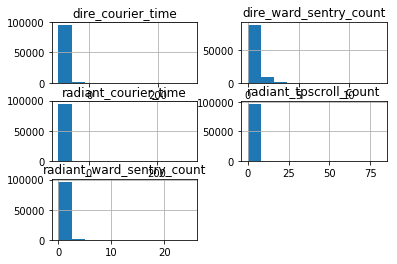

In [6]:
X[over_freq_feats].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bbbb92160>,
      dtype=object)

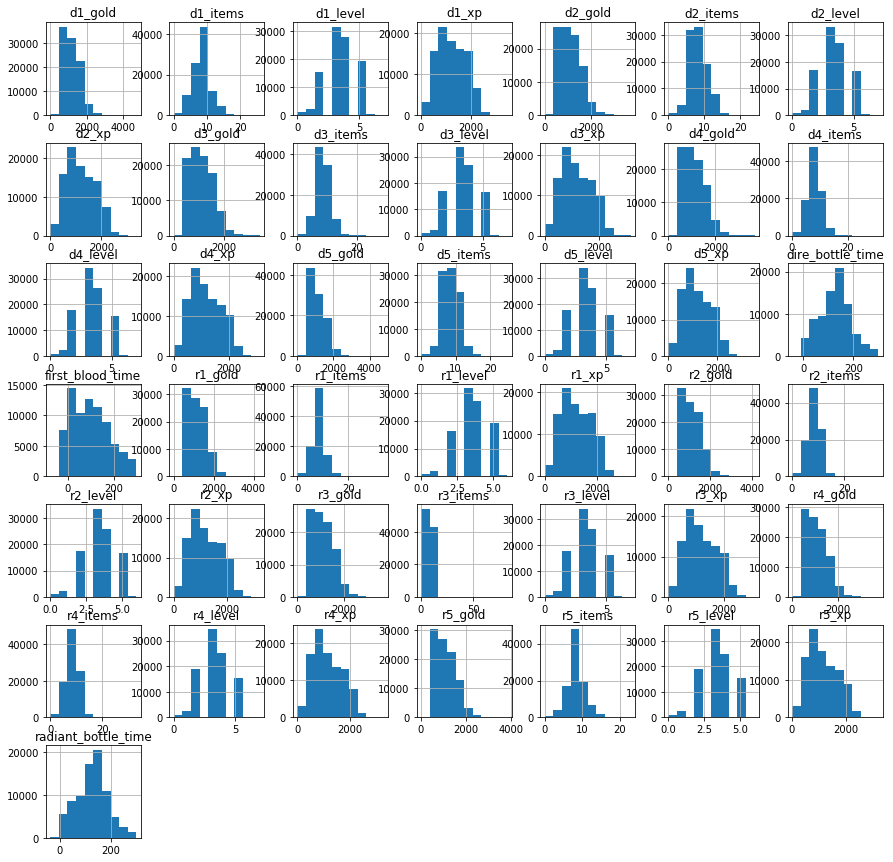

In [23]:
# X[norm_distribut_feats].hist(figsize=(15,15))

Посмотрим наличие пропусков

In [43]:
l = X.shape[0]
have_null_feats = []
for feat in X.columns:
    n = X[feat].isnull().sum()
    if n > 0:
        print(feat, n, round(n/l, 3))
        have_null_feats.append(feat)

first_blood_time 19553 0.201
first_blood_team 19553 0.201
first_blood_player1 19553 0.201
first_blood_player2 43987 0.452
radiant_bottle_time 15691 0.161
radiant_courier_time 692 0.007
radiant_flying_courier_time 27479 0.283
radiant_first_ward_time 1836 0.019
dire_bottle_time 16143 0.166
dire_courier_time 676 0.007
dire_flying_courier_time 26098 0.268
dire_first_ward_time 1826 0.019
